In [33]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

#### Test dataset loading

Dataset shape: (307, 2)


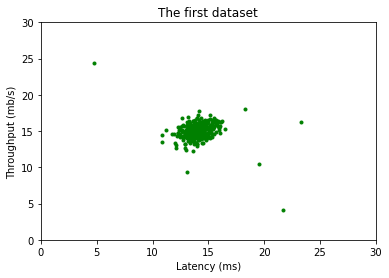

In [38]:
X_train = load_data_train()
print(f'Dataset shape: {X_train.shape}')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='.', c='g')
plt.title("The first dataset")
plt.ylabel('Throughput (mb/s)')
plt.xlabel('Latency (ms)')
plt.axis([0, 30, 0, 30])
plt.show()

In [35]:
mu, var = estimate_gaussian(X_train)
mu, var

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

#### Choosing best epsilon on validation dataset

In [36]:
X_val, y_val = load_data_val()
p_val = multivariate_gaussian(X_val, mu, var)
best_epsilon, best_F1 = select_threshold(y_val, p_val)
print(f'Best F1: {best_F1} --> Best epsilon: {best_epsilon}.')

Best F1: 0.8750000000000001 --> Best epsilon: 0.35503195382310676.


#### Scattering validation datapoints & marking anomalies

<Figure size 432x288 with 0 Axes>

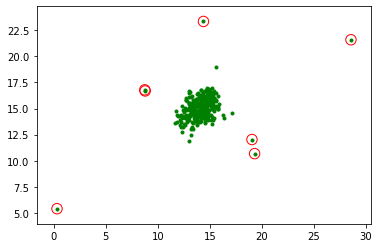

In [71]:
plt.clf()
fig, ax = plt.subplots()
ax.scatter(X_val[:, 0], X_val[:, 1], marker='.', c='g')
for x1, x2 in X_val[p_val < best_epsilon]:
    circle = plt.Circle((x1, x2), .5, color='red', fill=False)
    ax.add_patch(circle)